In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data_folder = Path("./titanic")
test_path = data_folder / "test.csv"
train_path = data_folder / "train.csv"

In [3]:
data_original = pd.read_csv(train_path)

In [4]:
data = data_original.copy()

In [5]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C


In [6]:
data.drop(columns=["Name", "PassengerId", "Embarked"], inplace=True)

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
dtype: object

In [8]:
for col in data.select_dtypes(exclude="number"):
    print(f"{col}:\n{data[col].value_counts()}\n")

Sex:
male      577
female    314
Name: Sex, dtype: int64

Ticket:
347082               7
CA. 2343             7
1601                 7
347088               6
3101295              6
                    ..
PC 17473             1
350035               1
350407               1
STON/O 2. 3101280    1
384461               1
Name: Ticket, Length: 681, dtype: int64

Cabin:
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
E40            1
C46            1
C110           1
E12            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64



In [9]:
data.drop(columns=["Ticket", "Cabin"], inplace=True)

In [14]:
# binary column
data["Sex"] = data["Sex"].astype("category").cat.codes

In [15]:
data.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [16]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

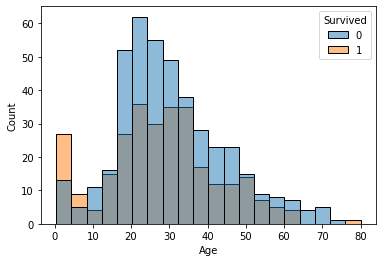

In [17]:
sn.histplot(data=data, x="Age", hue="Survived")

In [18]:
age_imputer = KNNImputer(n_neighbors=5)
age_imputer.fit(data.select_dtypes("number"))

KNNImputer()

In [19]:
data[[c for c in data.select_dtypes("number").columns]] = age_imputer.transform(data.select_dtypes("number"))

<AxesSubplot:xlabel='Age', ylabel='Count'>

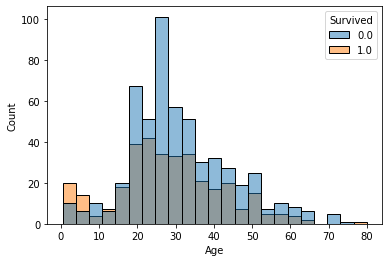

In [20]:
sn.histplot(data=data, x="Age", hue="Survived")

In [21]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
46,0.0,3.0,1.0,30.0,1.0,0.0,15.5000
612,1.0,3.0,0.0,28.8,1.0,0.0,15.5000
155,0.0,1.0,1.0,51.0,0.0,1.0,61.3792
135,0.0,2.0,1.0,23.0,0.0,0.0,15.0458
351,0.0,1.0,1.0,49.4,0.0,0.0,35.0000


Survived
Pclass
Age
SibSp
Parch
Fare


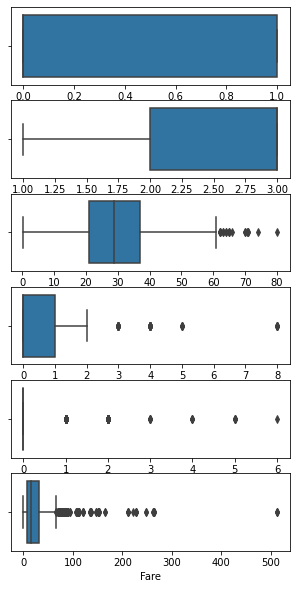

In [61]:
cols = [c for c in data.select_dtypes("number")]

fig, axis = plt.subplots(nrows=len(cols))
fig.set_size_inches(5, 10)

for col, ax in zip(cols, axis):
    print(col)
    sn.boxplot(data=data, x=col, ax=ax)

In [23]:
data = data.reindex(sorted(data.columns), axis=1)

In [24]:
data.describe()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,30.060052,32.204208,0.381594,2.308642,0.647587,0.523008,0.383838
std,13.666852,49.693429,0.806057,0.836071,0.477990,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,21.200000,7.910400,0.000000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,1.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,1.000000,8.000000,1.000000


In [25]:
scalers = {col: MinMaxScaler().fit(np.asarray(data[col]).reshape(-1, 1))
            for col in ["Age", "Fare", "Parch", "SibSp", "Pclass"]}

In [26]:
for col, scaler in scalers.items():
    data[col] = scaler.transform(np.asarray(data[col]).reshape(-1, 1))

In [27]:
data.describe()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.372456,0.062858,0.063599,0.654321,0.647587,0.065376,0.383838
std,0.171737,0.096995,0.134343,0.418036,0.477990,0.137843,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261121,0.015440,0.000000,0.500000,0.000000,0.000000,0.000000
50%,0.346569,0.028213,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.472229,0.060508,0.000000,1.000000,1.000000,0.125000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.sample(5)

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
648,0.411913,0.014737,0.000000,1.0,1.0,0.000,0.0
620,0.334004,0.028213,0.000000,1.0,1.0,0.125,0.0
566,0.233476,0.015412,0.000000,1.0,1.0,0.000,0.0
833,0.283740,0.015330,0.000000,1.0,1.0,0.000,0.0
763,0.447097,0.234224,0.333333,0.0,0.0,0.125,1.0


Готуємо колонки до кластеризації

In [29]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN
from sklearn.metrics import f1_score

In [38]:
def show_cluster(cluster, df, columns):
    df["class"] = cluster.fit_predict(df[columns])

    sn.scatterplot(data=df, hue="class", x="Fare", y="Age")
    plt.show()
    sn.scatterplot(data=df, hue="class", x="SibSp", y="Age")
    plt.show()

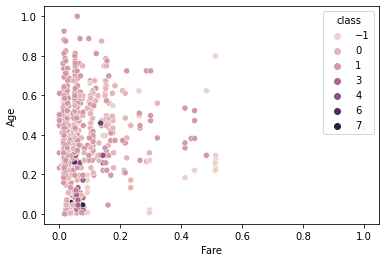

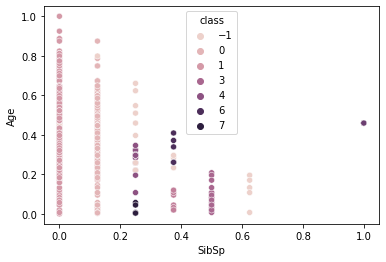

In [42]:
model = DBSCAN(eps=0.1)
show_cluster(model, data, ["Fare", "Age", "SibSp"])

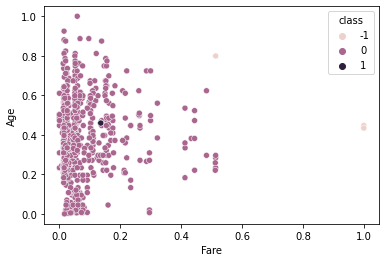

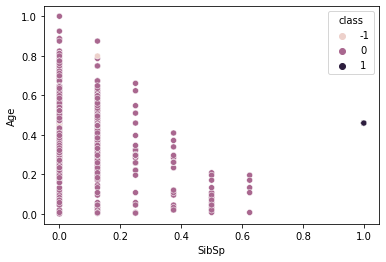

In [41]:
model = DBSCAN(eps=0.2)
show_cluster(model, data, ["Fare", "Age", "SibSp"])

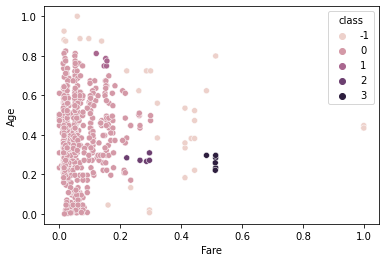

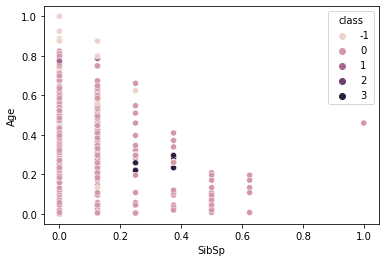

In [45]:
model = DBSCAN(eps=0.05)
show_cluster(model, data, ["Fare", "Age"])

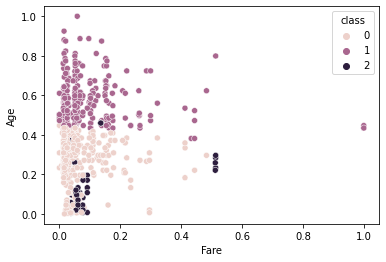

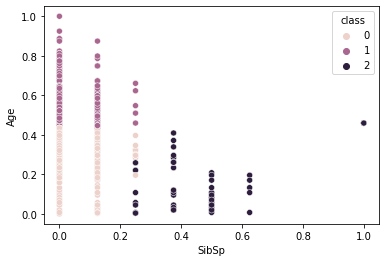

In [52]:
model = KMeans(n_clusters=3, random_state=15)
show_cluster(model, data, ["Fare", "Age", "SibSp"])

C:\Users\anton\.conda\envs\machine_learning\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


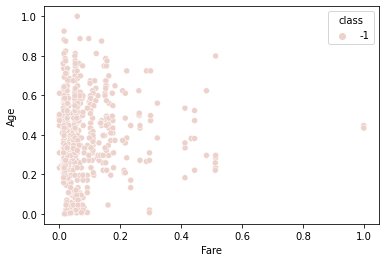

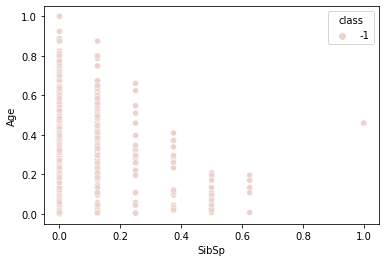

In [47]:
model2 = AffinityPropagation(random_state=15)
show_cluster(model2, data, data.columns)

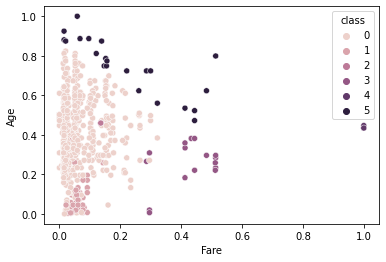

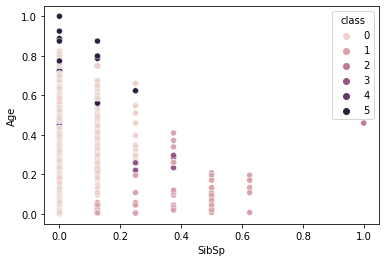

In [53]:
model3 = MeanShift()
show_cluster(model3, data, ["Fare", "Age", "SibSp"])